In [1]:
# Section 1: Import Dependencies and Configure Environment
import os, time, math
os.environ['OMP_NUM_THREADS']='1'
os.environ['MKL_NUM_THREADS']='1'
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['VECLIB_MAXIMUM_THREADS']='1'
os.environ['NUMEXPR_NUM_THREADS']='1'
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from hamiltonian import Hamiltonian
from rgf import GreensFunction

print('Environment configured.')

Environment configured.


In [2]:
# Section 2: Instantiate one_d_wire Hamiltonian (non-periodic)
ham = Hamiltonian('one_d_wire', periodic=False)
print({'N': ham.N, 't': ham.t, 'o': ham.o, 'mu1': ham.mu1, 'mu2': ham.mu2, 'kbT_eV': ham.kbT_eV})

{'N': 150, 't': 1, 'o': 0, 'mu1': 0.0, 'mu2': 0.0, 'kbT_eV': 8.617333e-05}


In [3]:
# Section 3: Create Energy Grid and GreensFunction Instance
energy = np.linspace(-5,5,300)
try:
    gf = GreensFunction(ham, energy_grid=energy)
    print('GreensFunction energy_grid shape:', gf.energy_grid.shape)
except Exception as e:
    print('Failed to instantiate GreensFunction:', e)
    raise

GreensFunction energy_grid shape: (300,)


Boltzmann Poisson converged in 2 iterations.


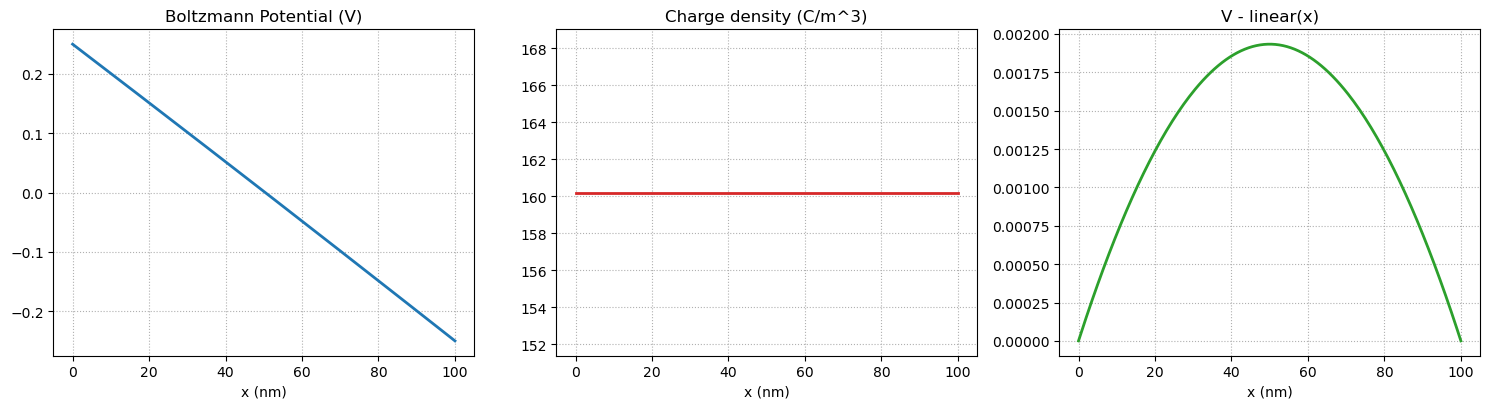

Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, interval, 1, gll_warped, unset, False, float64, []), (1,)), 0), Basix element (P, interval, 1, gll_warped, unset, False, float64, [])), 0)

In [4]:
from poisson_solver import solve_poisson_boltzmann, solve_poisson_negf

solve_poisson_boltzmann()

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 15 Terminate: Some process (or the batch system) has told this process to end
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
Abort(59) on node 0 (rank 0 in comm 0): application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0


Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mode (1 k-point or 1 process).
Running in serial mo

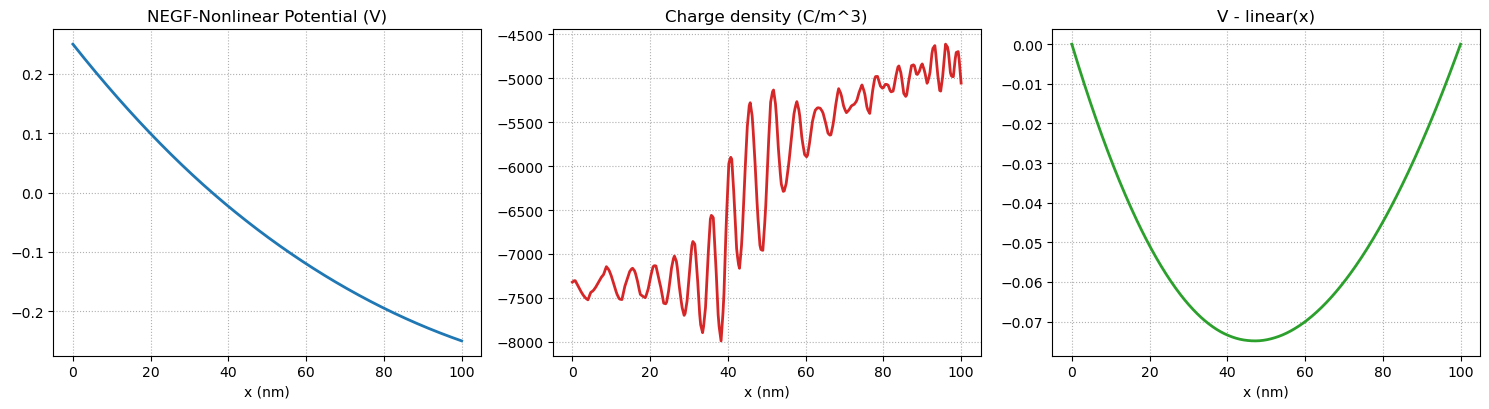

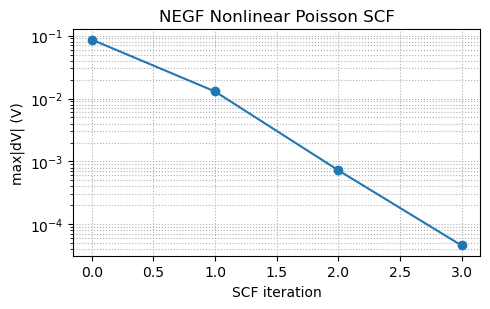

array([ 0.25      ,  0.24793896,  0.24588233,  0.24383011,  0.2417823 ,
        0.23973891,  0.23769996,  0.23566545,  0.2336354 ,  0.23160982,
        0.22958872,  0.22757212,  0.22556002,  0.22355244,  0.22154937,
        0.21955084,  0.21755684,  0.21556738,  0.21358243,  0.21160199,
        0.20962605,  0.20765458,  0.20568759,  0.20372507,  0.20176701,
        0.19981341,  0.19786424,  0.1959195 ,  0.19397918,  0.19204327,
        0.19011174,  0.1881846 ,  0.18626183,  0.18434343,  0.18242937,
        0.18051965,  0.17861424,  0.17671314,  0.17481638,  0.17292396,
        0.17103589,  0.1691522 ,  0.1672729 ,  0.16539802,  0.16352758,
        0.16166159,  0.15980009,  0.15794309,  0.15609061,  0.15424265,
        0.15239922,  0.15056033,  0.14872598,  0.14689613,  0.14507075,
        0.14324982,  0.14143331,  0.13962122,  0.1378135 ,  0.13601015,
        0.13421114,  0.13241647,  0.13062613,  0.12884011,  0.12705842,
        0.12528107,  0.12350809,  0.12173949,  0.11997529,  0.11

In [5]:
from poisson_solver import solve_poisson_boltzmann, solve_poisson_negf
solve_poisson_negf(gf, ham)

Running in serial mode (1 k-point or 1 process).


[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
Abort(59) on node 0 (rank 0 in comm 0): application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0


TypeError: Invalid shape (150,) for image data

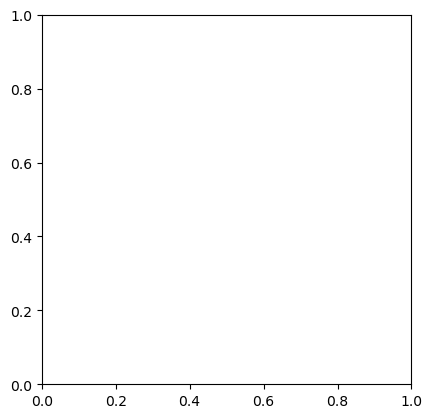

In [6]:
x = gf.get_n(np.linspace(.2,0,150), np.linspace(.2,0,150),-2)
plt.imshow(x)